#### Loading data

In [1]:
# import packages
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# loading training and validation data to be splitted and analyzed as a pandas Dataframe
tvs = pd.read_csv('ML-CUP22-TR.csv', skiprows=6, header=0,
      names= ['exemples', 'input_1', 'input_2', 'input_3', 'input_4', 'input_5', 'input_6', 'input_7', 'input_8', 
      'input_9', 'target_1', 'target_2'], 
      index_col= ['exemples'])

# loading it in a numpy array skipping the first 7 rows
tvs_array = np.loadtxt('ML-CUP22-TR.csv', skiprows=6, delimiter=',')

#### Manipulating data

In [3]:
# visualizing infos about our Dataframe
tvs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 1 to 1492
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   input_1   1492 non-null   float64
 1   input_2   1492 non-null   float64
 2   input_3   1492 non-null   float64
 3   input_4   1492 non-null   float64
 4   input_5   1492 non-null   float64
 5   input_6   1492 non-null   float64
 6   input_7   1492 non-null   float64
 7   input_8   1492 non-null   float64
 8   input_9   1492 non-null   float64
 9   target_1  1492 non-null   float64
 10  target_2  1492 non-null   float64
dtypes: float64(11)
memory usage: 139.9 KB


We note that there are no lacking entries, there are 1492 exemples each one made up of 9 inputs and we have 2 target outputs.

In [4]:
# just to see if it functions: print out some rows and columns
tvs.loc[[2,4], :]

,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,target_1,target_2
exemples,,,,,,,,,,,
2,-0.888962,0.711473,-0.480023,0.748175,-0.981763,1.765482,-0.445018,1.719143,-1.09625,18.88552,-28.377440
4,0.630938,-0.295533,1.379162,-0.041045,-0.250695,0.025003,0.143915,0.861455,0.87954,10.25682,-30.017064


#### Data Visualization

In [5]:
# 3D plots of each pair of inputs respectively for target 1 and 2
'''
sns.set(rc={'figure.figsize':(40,32)})
sns.set(style = "ticks")
cmap = ListedColormap(sns.color_palette("flare", 1000).as_hex())

for j in range(1, 10):
    fig = plt.figure()
    o = 1
    for i in range(1,10):
        if i > j:
            ax = fig.add_subplot(3,3,o, projection = '3d')
    
            inpi_ = 'input_' + str(i)
            inpj_ = 'input_' + str(j)
            x = tvs[inpj_]
            y = tvs[inpi_]
            z = tvs['target_1']

            inp_i = 'input ' + str(i)
            inp_j = 'input ' + str(j)
            ax.set_xlabel(inp_j)
            ax.set_ylabel(inp_i)
            ax.set_zlabel("target 1")

            sc = ax.scatter(x, y, z, c=z, marker='o', cmap=cmap, alpha=0.55)
            o += 1

            plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.06, 1), loc=2)

    plt.show()


for j in range(1, 10):
    fig = plt.figure()
    o = 1
    for i in range(1,10):
        if i > j:
            ax = fig.add_subplot(3,3,o, projection = '3d')
    
            inpi_ = 'input_' + str(i)
            inpj_ = 'input_' + str(j)
            x = tvs[inpj_]
            y = tvs[inpi_]
            z = tvs['target_2']

            inp_i = 'input ' + str(i)
            inp_j = 'input ' + str(j)
            ax.set_xlabel(inp_j)
            ax.set_ylabel(inp_i)
            ax.set_zlabel("target 2")

            sc = ax.scatter(x, y, z, c=z, marker='o', cmap=cmap, alpha=0.55)
            o += 1

            plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.06, 1), loc=2)

    plt.show()
'''

'sns.set(rc={\'figure.figsize\':(40,32)})\nsns.set(style = "ticks")\ncmap = ListedColormap(sns.color_palette("flare", 1000).as_hex())\n\nfor j in range(1, 10):\n    fig = plt.figure()\n    o = 1\n    for i in range(1,10):\n        if i > j:\n            ax = fig.add_subplot(3,3,o, projection = \'3d\')\n    \n            inpi_ = \'input_\' + str(i)\n            inpj_ = \'input_\' + str(j)\n            x = tvs[inpj_]\n            y = tvs[inpi_]\n            z = tvs[\'target_1\']\n\n            inp_i = \'input \' + str(i)\n            inp_j = \'input \' + str(j)\n            ax.set_xlabel(inp_j)\n            ax.set_ylabel(inp_i)\n            ax.set_zlabel("target 1")\n\n            sc = ax.scatter(x, y, z, c=z, marker=\'o\', cmap=cmap, alpha=0.55)\n            o += 1\n\n            plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.06, 1), loc=2)\n\n    plt.show()\n\n\nfor j in range(1, 10):\n    fig = plt.figure()\n    o = 1\n    for i in range(1,10):\n        if i > j:\n            ax 

#### Correlations

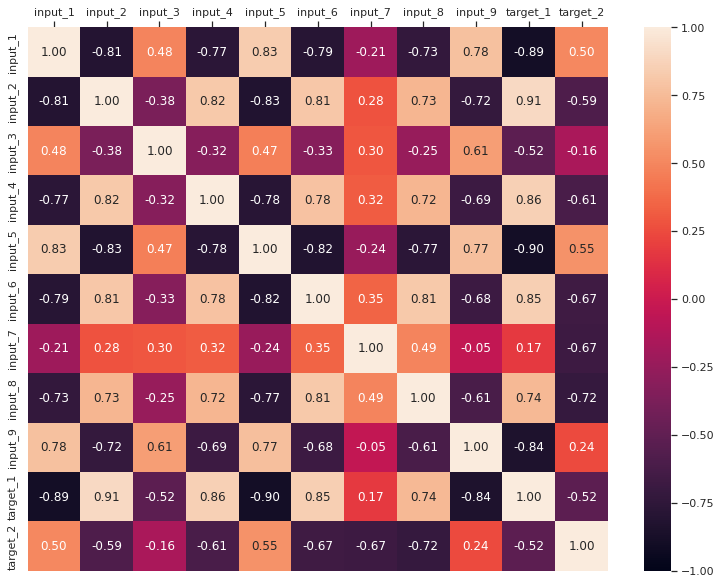

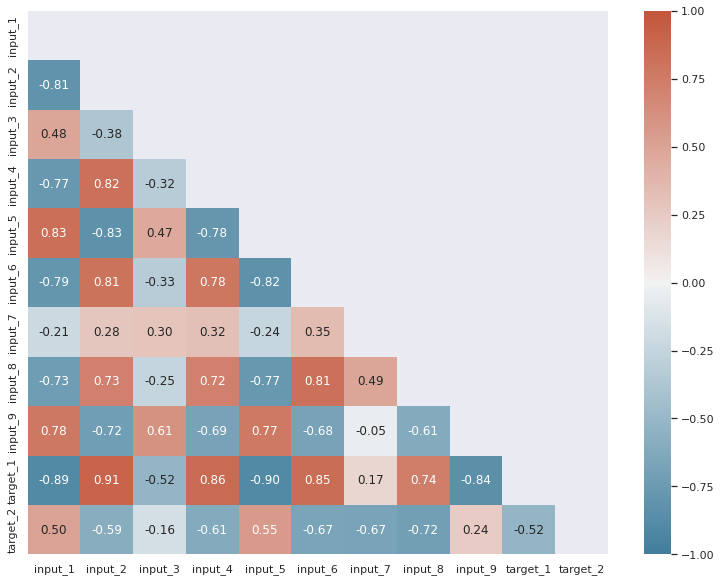

In [6]:
# the correlation heat map representing the correlation matrix (Pearson's correlation coefficient)

sns.set(rc={'figure.figsize':(13,10)})
correlations = tvs.corr()
ax = sns.heatmap(correlations, annot=True, fmt=".2f", vmin=-1., vmax=+1.)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.show()

# and with mask for the upper triangle

mask = np.triu(np.ones_like(correlations, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlations, annot=True, mask = mask, cmap=cmap, fmt=".2f", vmin=-1., vmax=+1.)
plt.show()

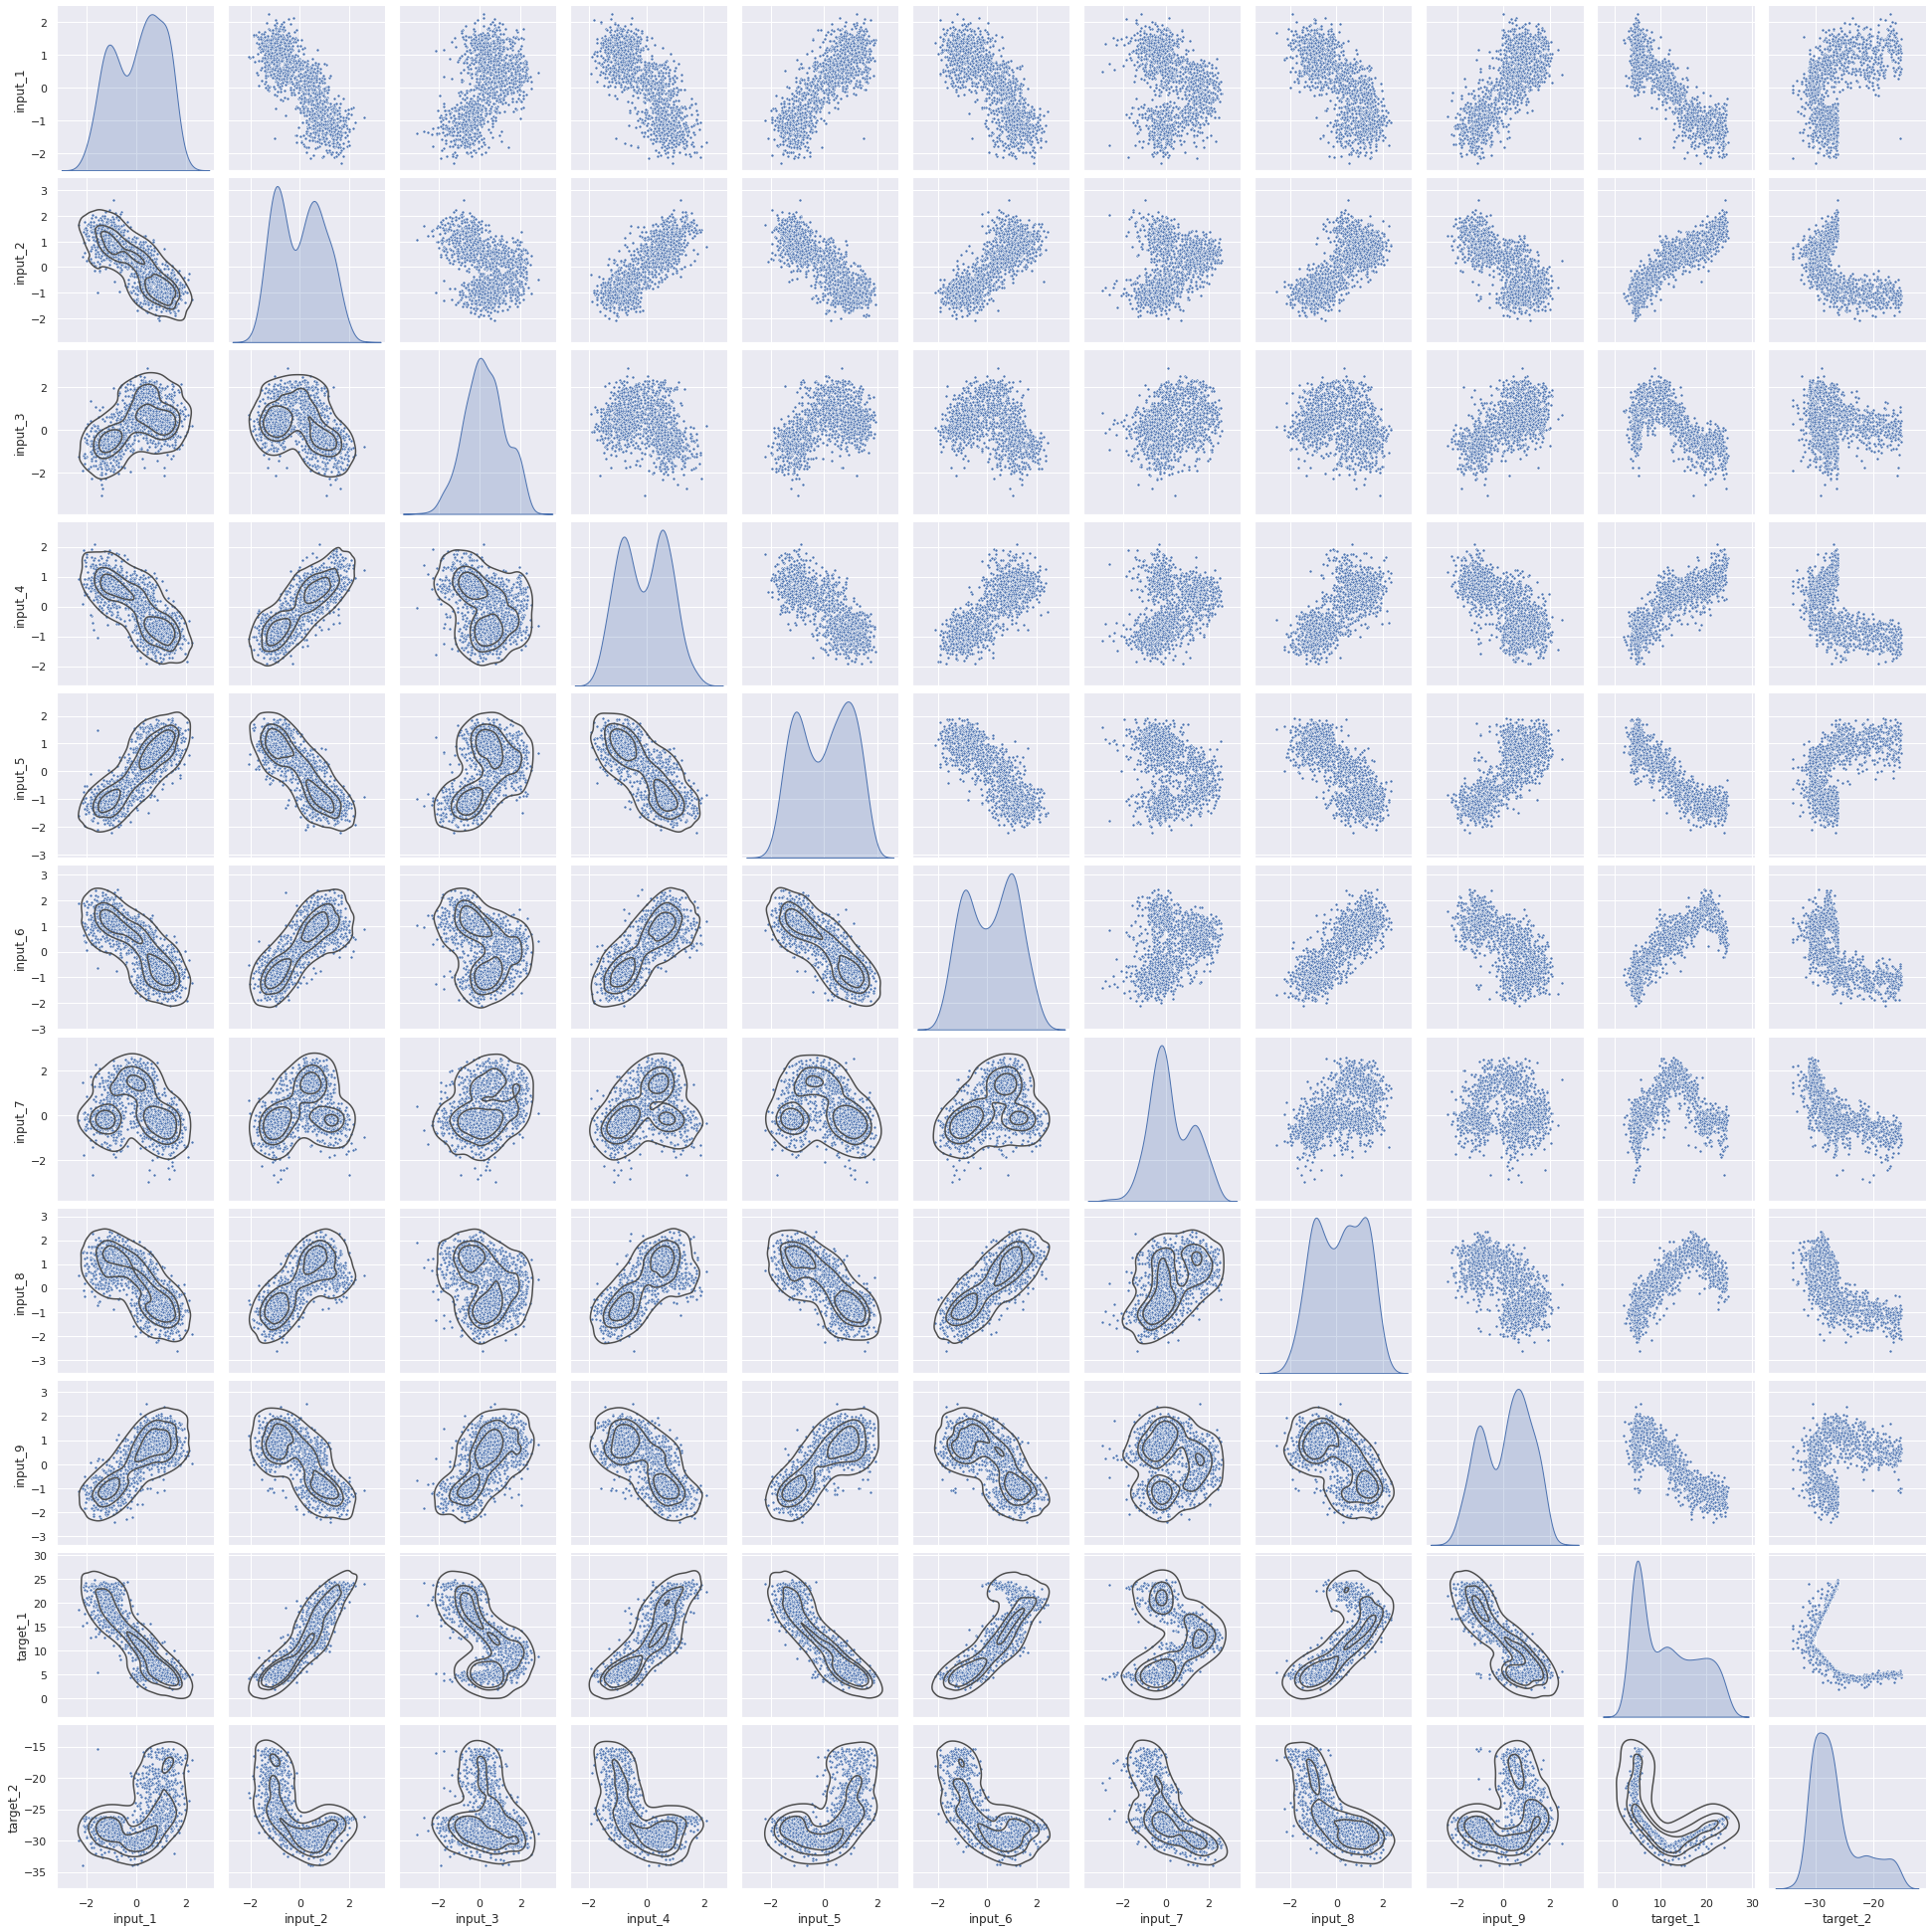

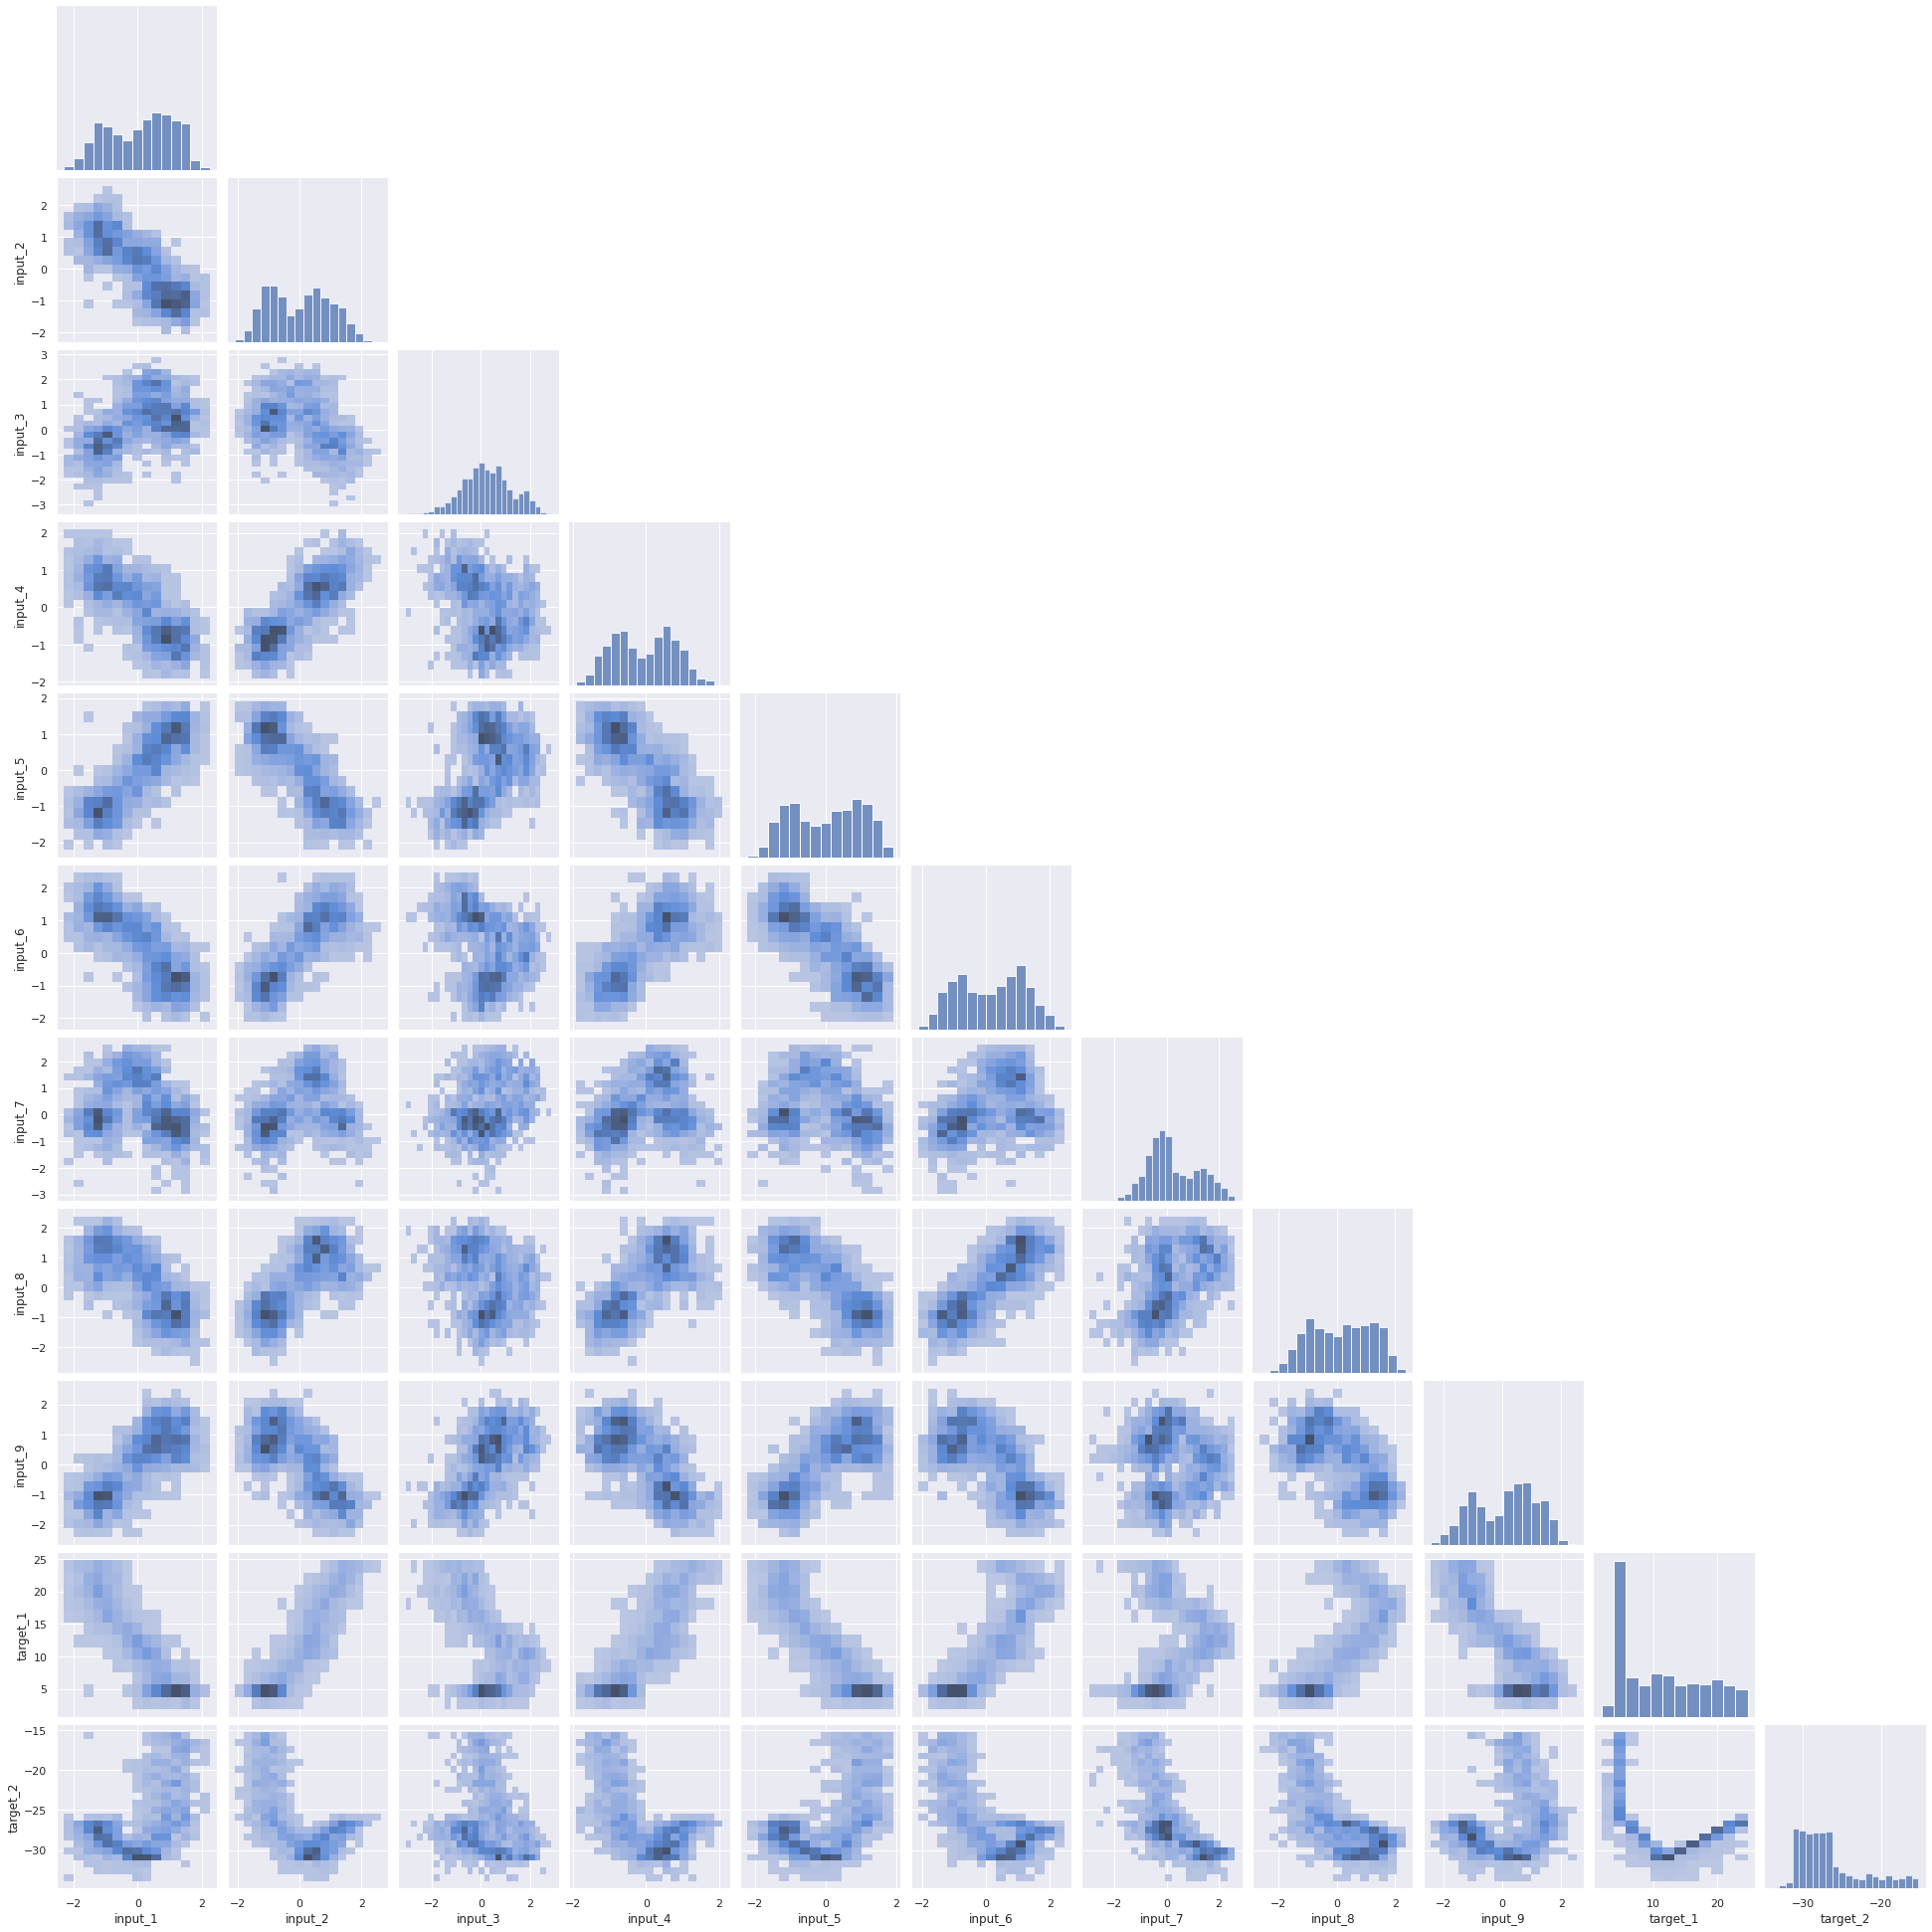

In [7]:
# scatter plots to visualize correlations between inputs
g = sns.pairplot(tvs, markers='.', diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color='.3')
plt.show()

g = sns.pairplot(tvs, kind='hist', corner=True)
plt.show()